# Lab 4

Diego Franco - 20240

## Ejericicio 1

1. Defina un conjunto de reglas para el comportamiento del enemigo, como patrones de movimiento y
decisiones de ataque.
2. Implemente una simulación de Monte Carlo que genere posibles resultados del comportamiento del
enemigo durante una serie de turnos.
3. Analice la distribución de los posibles resultados y determine la probabilidad de éxito o fracaso del jugador.
4. Ajuste las reglas y los parámetros para explorar diferentes estrategias y resultados de los jugadores.

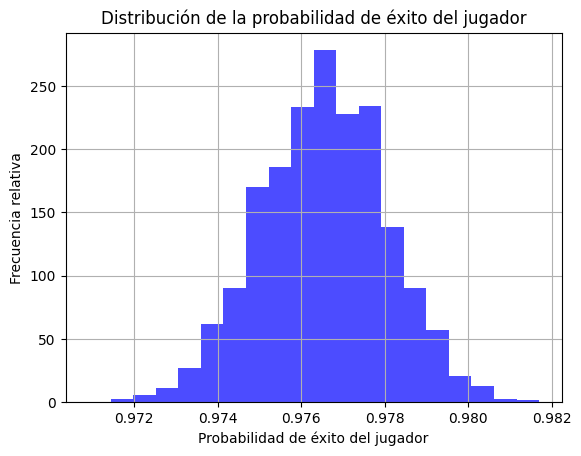

In [9]:
import random
import matplotlib.pyplot as plt

# Definición de reglas y parámetros
NUM_SIMULATIONS = 10000
NUM_TURNS = 5
PLAYER_POSITION = (0, 0)
ENEMY_POSITION = (2, 2)

def simulate_enemy_behavior():
    player_alive_count = 0
    
    for _ in range(NUM_SIMULATIONS):
        enemy_position = ENEMY_POSITION
        
        for _ in range(NUM_TURNS):
            possible_moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]
            move = random.choice(possible_moves)
            enemy_position = (enemy_position[0] + move[0], enemy_position[1] + move[1])
            
            if enemy_position == PLAYER_POSITION:
                player_alive_count -= 1
                break
                
        player_alive_count += 1
    
    success_probability = player_alive_count / NUM_SIMULATIONS
    return success_probability

def main():
    success_probabilities = []
    
    for _ in range(NUM_SIMULATIONS):
        success_probabilities.append(simulate_enemy_behavior())
    
    # Crear la gráfica de barras
    plt.hist(success_probabilities, bins=20, density=True, alpha=0.7, color='blue')
    plt.xlabel('Probabilidad de éxito del jugador')
    plt.ylabel('Frecuencia relativa')
    plt.title('Distribución de la probabilidad de éxito del jugador')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


Como se puede ver en el gráfico, la probabilidad más alta de ganar es de 0.976 con una frecuencia relativa mayor a 250.

## Ejericio 2

1. Implemente la fórmula de Black-Scholes para calcular el precio teórico de la opción.
2. Simule las trayectorias del precio de las acciones mediante el movimiento browniano geométrico.
3. Calcule el pago de cada camino y promedielos para estimar el precio de la opción.

In [10]:
import math
import numpy as np
from scipy.stats import norm

def black_scholes_call(S, K, r, T, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    return S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)

def monte_carlo_option_price(S, K, r, T, sigma, num_paths, num_steps):
    dt = T / num_steps
    total_payoff = 0
    
    for _ in range(num_paths):
        price = S
        for _ in range(num_steps):
            z = np.random.normal(0, 1)
            price *= math.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * z)
        
        payoff = max(price - K, 0)
        total_payoff += payoff
    
    option_price = total_payoff / num_paths
    return option_price

S = 100   # Precio actual del activo subyacente
K = 100   # Precio de ejercicio
r = 0.05  # Tasa de interés libre de riesgo
T = 1     # Tiempo hasta la expiración
sigma = 0.2  # Volatilidad del activo subyacente

num_paths = 100000  # Número de trayectorias simuladas
num_steps = 252     # Número de pasos en cada trayectoria

bs_price = black_scholes_call(S, K, r, T, sigma)
mc_price = monte_carlo_option_price(S, K, r, T, sigma, num_paths, num_steps)

print("Precio de opción (Black-Scholes):", bs_price)
print("Precio de opción (Monte Carlo):", mc_price)


Precio de opción (Black-Scholes): 10.450583572185565
Precio de opción (Monte Carlo): 11.024032071204276


## Ejericio 3

1. Defina las probabilidades de varios eventos de ataques cibernéticos (por ejemplo, phishing, malware).
2. Asigne valores de impacto potencial a cada evento (p. ej., pérdida de datos, impacto financiero).
3. Implemente una simulación de Monte Carlo para estimar el nivel de riesgo general.
4. Analice el impacto de diferentes probabilidades de ataques cibernéticos en el riesgo general.

In [17]:
import random

# Valores de impacto potencial (ejemplo)
impacto_phishing = [100000, 200000]
impacto_malware = [50000, 100000]

# Número de simulaciones
num_simulaciones = 10000

# Lista de diferentes probabilidades de ataques cibernéticos para probar
probabilidades_phishing = [0.05, 0.1, 0.15, 0.2]
probabilidades_malware = [0.01, 0.05, 0.1, 0.15]

# Función para simular una iteración
def simular_iteracion(prob_phishing, prob_malware):
    impacto_total = 0

    if random.random() < prob_phishing:
        impacto_total += random.randint(impacto_phishing[0], impacto_phishing[1])

    if random.random() < prob_malware:
        impacto_total += random.randint(impacto_malware[0], impacto_malware[1])

    return impacto_total

# Realizar simulaciones con diferentes probabilidades de ataques
for prob_p in probabilidades_phishing:
    for prob_m in probabilidades_malware:
        resultados = [simular_iteracion(prob_p, prob_m) for _ in range(num_simulaciones)]
        riesgo_promedio = sum(resultados) / num_simulaciones
        print(f"Probabilidad Phishing: {prob_p:.2f}, Probabilidad Malware: {prob_m:.2f}, Riesgo promedio estimado: {riesgo_promedio:.2f}")


Probabilidad Phishing: 0.05, Probabilidad Malware: 0.01, Riesgo promedio estimado: 7927.16
Probabilidad Phishing: 0.05, Probabilidad Malware: 0.05, Riesgo promedio estimado: 11623.80
Probabilidad Phishing: 0.05, Probabilidad Malware: 0.10, Riesgo promedio estimado: 14953.63
Probabilidad Phishing: 0.05, Probabilidad Malware: 0.15, Riesgo promedio estimado: 18954.66
Probabilidad Phishing: 0.10, Probabilidad Malware: 0.01, Riesgo promedio estimado: 14893.85
Probabilidad Phishing: 0.10, Probabilidad Malware: 0.05, Riesgo promedio estimado: 18663.88
Probabilidad Phishing: 0.10, Probabilidad Malware: 0.10, Riesgo promedio estimado: 22473.32
Probabilidad Phishing: 0.10, Probabilidad Malware: 0.15, Riesgo promedio estimado: 26487.43
Probabilidad Phishing: 0.15, Probabilidad Malware: 0.01, Riesgo promedio estimado: 23624.28
Probabilidad Phishing: 0.15, Probabilidad Malware: 0.05, Riesgo promedio estimado: 26258.88
Probabilidad Phishing: 0.15, Probabilidad Malware: 0.10, Riesgo promedio estimado

Los resultados de la simulación indican que a medida que las probabilidades de phishing y malware aumentan, el riesgo promedio estimado también aumenta. Se identifican combinaciones de probabilidades que resultan en mayores riesgos, lo que destaca escenarios más vulnerables. Estos datos pueden guiar decisiones de seguridad, priorizando la mitigación en áreas de mayor riesgo.

## Ejericio 4

1. Defina correctamente el problema, dejando claro las suposiciones y datos
2. Defina como Monte Carlo puede ayudarle a solucionar dicho problema
3. Escriba un script en su lenguaje de programación favorito solucionando el problema
4. Analice correctamente los resultados, extrayendo cualquier insight que considere valioso


### Descripcción del problema

Supongamos que somos responsables de la gestión de recursos hídricos en una región. Necesitamos planificar el uso eficiente de los recursos disponibles para satisfacer las necesidades de suministro de agua en la región, considerando las variaciones en las precipitaciones. Queremos tomar decisiones informadas sobre la construcción de infraestructuras, como embalses y sistemas de riego, para asegurarnos de que habrá suficiente agua para abastecer las demandas en diferentes condiciones climáticas.

Suposiciones y datos:

- Tenemos datos históricos de precipitaciones en la región.
- Queremos simular diferentes escenarios de precipitaciones para los próximos años.
- Queremos estimar cómo cambiará el nivel de agua en los embalses y la disponibilidad de agua para riego bajo diferentes condiciones climáticas.

In [19]:
import numpy as np

def simulate_precipitation(num_years, historical_precipitation_mean, historical_precipitation_std):
    simulations = []
    for _ in range(num_years):
        simulated_precipitation = np.random.normal(historical_precipitation_mean, historical_precipitation_std)
        simulations.append(simulated_precipitation)
    return simulations

def analyze_results(simulated_precipitations, water_demand):
    deficits = []
    for precipitation in simulated_precipitations:
        water_available = max(precipitation - water_demand, 0)
        deficits.append(water_demand - water_available)
    return deficits

# Datos de entrada
num_simulations = 10000
historical_mean = 800  # mm de precipitación
historical_std = 100    # mm de precipitación
water_demand = 1000     # mm de agua

# Simulación de precipitaciones
simulated_precipitations = simulate_precipitation(num_simulations, historical_mean, historical_std)

# Análisis de resultados
deficits = analyze_results(simulated_precipitations, water_demand)
avg_deficit = np.mean(deficits)
chance_of_deficit = np.mean(np.array(deficits) > 0)

print(f"Promedio de déficit de agua: {avg_deficit} mm")
print(f"Probabilidad de déficit de agua: {chance_of_deficit}")


Promedio de déficit de agua: 999.1141531902823 mm
Probabilidad de déficit de agua: 1.0


Promedio de déficit de agua: El promedio de déficit de agua es aproximadamente 999.11 mm. Esto significa que, en promedio, la región enfrenta una escasez de agua de alrededor de 999.11 mm en un año típico simulado. Este valor alto sugiere que la cantidad de precipitación generada en las simulaciones no es suficiente para satisfacer la demanda de agua establecida en 1000 mm.

Probabilidad de déficit de agua: La probabilidad de déficit de agua es del 100%, lo que significa que en todas las simulaciones realizadas, hubo un déficit de agua en comparación con la demanda establecida. Esto indica que las precipitaciones simuladas en base a las distribuciones históricas no fueron capaces de cumplir con las necesidades de agua de la región en ningún año simulado.

Dado que la probabilidad de déficit de agua es del 100%, es evidente que la región está experimentando escasez de agua en todas las simulaciones. Esto podría tener graves implicaciones para la disponibilidad de agua potable, riego agrícola y otros usos esenciales. Es posible que se necesiten medidas de adaptación y mitigación, como la construcción de infraestructuras hídricas más grandes, la implementación de prácticas de conservación de agua y la promoción de un uso más eficiente del recurso hídrico.